## System setup

---


##### Importing modules


In [2]:
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import (
    TensorBoard,
    ModelCheckpoint,
    EarlyStopping,
    ReduceLROnPlateau
)

from toolkit.classes import DataSet, ImageProcessor, Augmenter, Model

2023-01-15 07:53:41.038080: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-15 07:53:41.600353: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-15 07:53:41.600410: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-15 07:53:43.608950: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

## Read dataset

---


##### Create image dataframe


In [3]:
images = DataSet()

In [4]:
datasets = ["raw", "data", "augmented", "preprocessed"]
for dataset in datasets:
    images.update_dataset(dataset=dataset)


Found 150 images in ./raw/Train/Non defective/
Found 150 images in ./raw/Train/Defective/
Found 31 images in ./raw/Validation/Non defective/
Found 31 images in ./raw/Validation/Defective/
Found 11 images in ./raw/Test/Non defective/
Found 11 images in ./raw/Test/Defective/
Found 150 images in ./data/Train/Non defective/
Found 150 images in ./data/Train/Defective/
Found 31 images in ./data/Validation/Non defective/
Found 31 images in ./data/Validation/Defective/
Found 11 images in ./data/Test/Non defective/
Found 11 images in ./data/Test/Defective/
Found 25 images in ./augmented/Train/Non defective/
Found 25 images in ./augmented/Train/Defective/
Found 175 images in ./preprocessed/Train/Non defective/
Found 175 images in ./preprocessed/Train/Defective/
Found 31 images in ./preprocessed/Validation/Non defective/
Found 31 images in ./preprocessed/Validation/Defective/
Found 11 images in ./preprocessed/Test/Non defective/
Found 11 images in ./preprocessed/Test/Defective/


## Data augmentation

---


In [8]:
N_augmented = 25

image_augmenter = Augmenter(N_augmented, images.data)
image_augmenter.remove_old_data(images.augmented_folder)
image_augmenter.augment_images()
del image_augmenter
images.update_dataset("augmented")
images.augmented


100%|██████████| 25/25 [00:08<00:00,  3.08it/s]


Found 25 images in ./augmented/Train/Non defective/
Found 25 images in ./augmented/Train/Defective/


,type,defect,defect_str,path,filename,img,height,width,components,R_mean,G_mean,B_mean
0,train,0,Non defective,./augmented/Train/Non defective/,75_augmented.jpg,./augmented/Train/Non defective/75_augmented.jpg,0,0,0,0.0,0.0,0.0
1,train,0,Non defective,./augmented/Train/Non defective/,29_augmented.jpg,./augmented/Train/Non defective/29_augmented.jpg,0,0,0,0.0,0.0,0.0
2,train,0,Non defective,./augmented/Train/Non defective/,14_augmented.jpg,./augmented/Train/Non defective/14_augmented.jpg,0,0,0,0.0,0.0,0.0
3,train,0,Non defective,./augmented/Train/Non defective/,56_augmented.jpg,./augmented/Train/Non defective/56_augmented.jpg,0,0,0,0.0,0.0,0.0
4,train,0,Non defective,./augmented/Train/Non defective/,112_augmented.jpg,./augmented/Train/Non defective/112_augmented.jpg,0,0,0,0.0,0.0,0.0
5,train,0,Non defective,./augmented/Train/Non defective/,39_augmented.jpg,./augmented/Train/Non defective/39_augmented.jpg,0,0,0,0.0,0.0,0.0
6,train,0,Non defective,./augmented/Train/Non defective/,7_augmented.jpg,./augmented/Train/Non defective/7_augmented.jpg,0,0,0,0.0,0.0,0.0
7,train,0,Non defective,./augmented/Train/Non defective/,33_augmented.jpg,./augmented/Train/Non defective/33_augmented.jpg,0,0,0,0.0,0.0,0.0
8,train,0,Non defective,./augmented/Train/Non defective/,63_augmented.jpg,./augmented/Train/Non defective/63_augmented.jpg,0,0,0,0.0,0.0,0.0
9,train,0,Non defective,./augmented/Train/Non defective/,140_augmented.jpg,./augmented/Train/Non defective/140_augmented.jpg,0,0,0,0.0,0.0,0.0


## Image processing

---


In [4]:
img_height = 227
img_width = 227

preprocessing_steps = [
    "original",
    "resize",
    "save",
]

preprocessing_kwargs = {
    "crop": {"ratio": 0.1},
    "resize": {"height": img_height, "width": img_width},
    "hist_eq": {
        "type": "CLAHE",
        "size": (16, 16),
    },
    "noise_filt": {"type": "median", "size": 11},
    "Laplacian": {"size": 5},
    "Canny": {"low": 100, "high": 200},
    "Hough": {"minLineLength": 10, "maxLineGap": 20},
    "feat_detect": {"type": "ORB"},
}


In [5]:
image_processor = ImageProcessor(steps=preprocessing_steps, kwargs=preprocessing_kwargs)
image_processor.remove_old_data(images.preprocessed_folder)
image_processor.process_images(images.data)
image_processor.process_images(images.augmented)
del image_processor


384it [02:25,  2.63it/s]
50it [00:21,  2.29it/s]


## Model build

---


##### Construct neural network


In [8]:
CNN = Model('AlexNet')

CNN.epochs = 1000
CNN.batch_size = 32

CNN.optimizer = Adam(
    learning_rate=0.0001
)

CNN.callbacks = [
    TensorBoard(log_dir="./logs", write_images=True),
    ModelCheckpoint(
        f"./models/{CNN.name}.h5",
        monitor="val_accuracy",
        verbose=1,
        save_best_only=True,
        save_weights_only=False,
        mode="auto",
        save_freq="epoch",
    ),
    EarlyStopping(
        monitor="val_accuracy",
        patience=200,
        verbose=1,
        mode="auto",
        restore_best_weights=True
    ),
    ReduceLROnPlateau(
        monitor="val_accuracy",
        factor=0.1,
        patience=2,
        verbose=1,
        mode="auto",
        min_lr=0.000005
    )
]

CNN.load_datasets(color_mode='rgb')
CNN.build_model()
CNN.compile_model()
CNN.model.summary()


Found 350 files belonging to 2 classes.
Found 62 files belonging to 2 classes.
Found 22 files belonging to 2 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 227, 227, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 27, 27, 96)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 256)      0         
 2D)                                                             
  

##### Train


In [9]:
CNN.train_net()


Epoch 1/1000
11/11 [==============================] - ETA: 0s - loss: 0.6949 - accuracy: 0.5229
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to ./models/AlexNet.h5
11/11 [==============================] - 66s 6s/step - loss: 0.6949 - accuracy: 0.5229 - val_loss: 0.7126 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/1000
11/11 [==============================] - ETA: 0s - loss: 0.6935 - accuracy: 0.5114
Epoch 2: val_accuracy did not improve from 0.50000
11/11 [==============================] - 54s 5s/step - loss: 0.6935 - accuracy: 0.5114 - val_loss: 0.6913 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 3/1000
11/11 [==============================] - ETA: 0s - loss: 0.6923 - accuracy: 0.5514
Epoch 3: val_accuracy did not improve from 0.50000

Epoch 3: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.
11/11 [==============================] - 51s 4s/step - loss: 0.6923 - accuracy: 0.5514 - val_loss: 0.6903 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 

##### Predict


In [10]:
CNN.predict_test()


1/1 [==============================] - 2s 2s/step
Test values:          [1 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0]
Predicted values:     [0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1]


##### Metrics


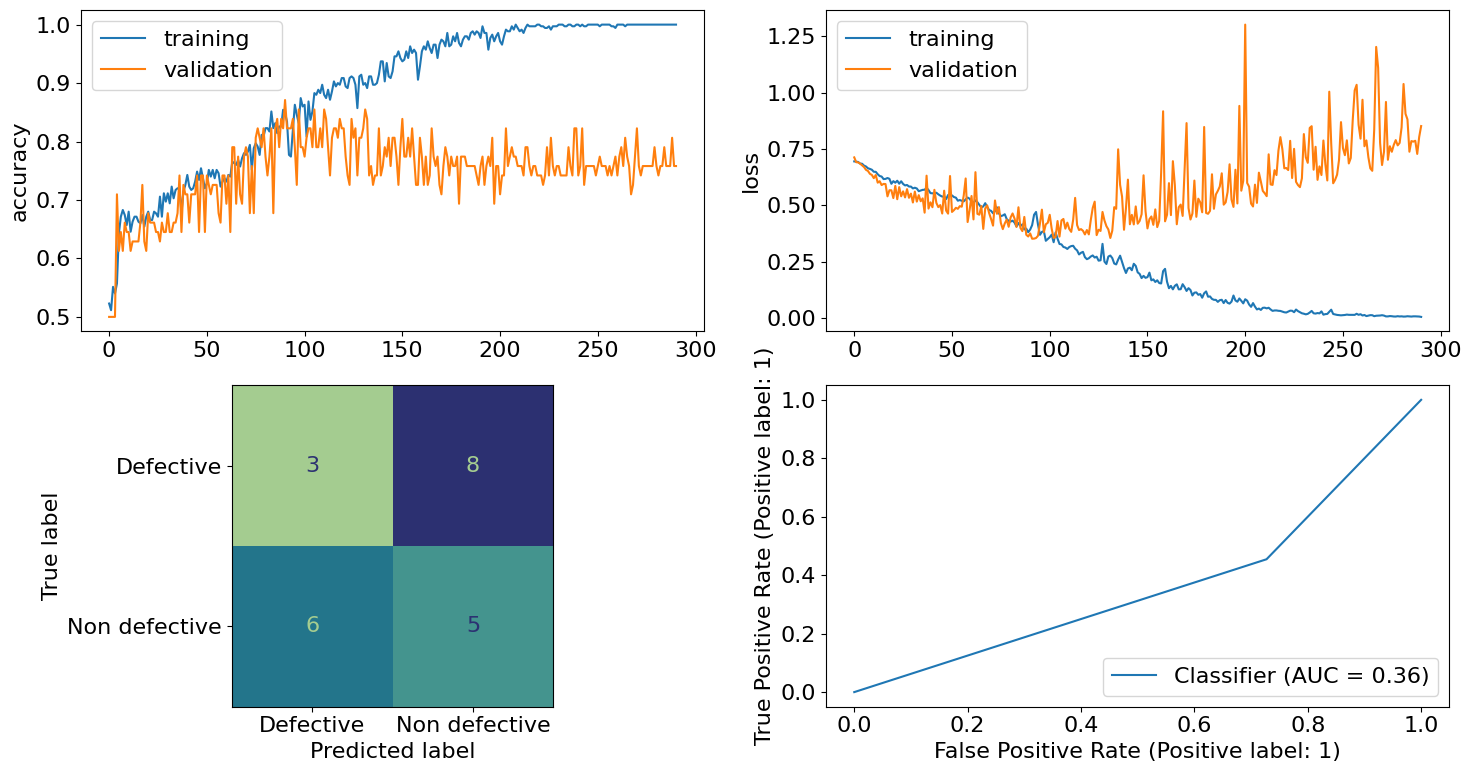

In [11]:
CNN.show_metrics(save_folder=images.plot_folder)


#### Run with tuned learning rate

Found 350 files belonging to 2 classes.
Found 62 files belonging to 2 classes.
Found 22 files belonging to 2 classes.
Epoch 1/100
11/11 [==============================] - ETA: 0s - loss: 0.6937 - accuracy: 0.5429
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to ./models/AlexNet_LR.h5
11/11 [==============================] - 39s 3s/step - loss: 0.6937 - accuracy: 0.5429 - val_loss: 0.7079 - val_accuracy: 0.5000
Epoch 2/100
11/11 [==============================] - ETA: 0s - loss: 0.6947 - accuracy: 0.5229
Epoch 2: val_accuracy did not improve from 0.50000
11/11 [==============================] - 28s 2s/step - loss: 0.6947 - accuracy: 0.5229 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 3/100
11/11 [==============================] - ETA: 0s - loss: 0.6972 - accuracy: 0.5057
Epoch 3: val_accuracy did not improve from 0.50000
11/11 [==============================] - 30s 3s/step - loss: 0.6972 - accuracy: 0.5057 - val_loss: 0.7047 - val_accuracy: 0.5000
Epoch 4/100
11/1

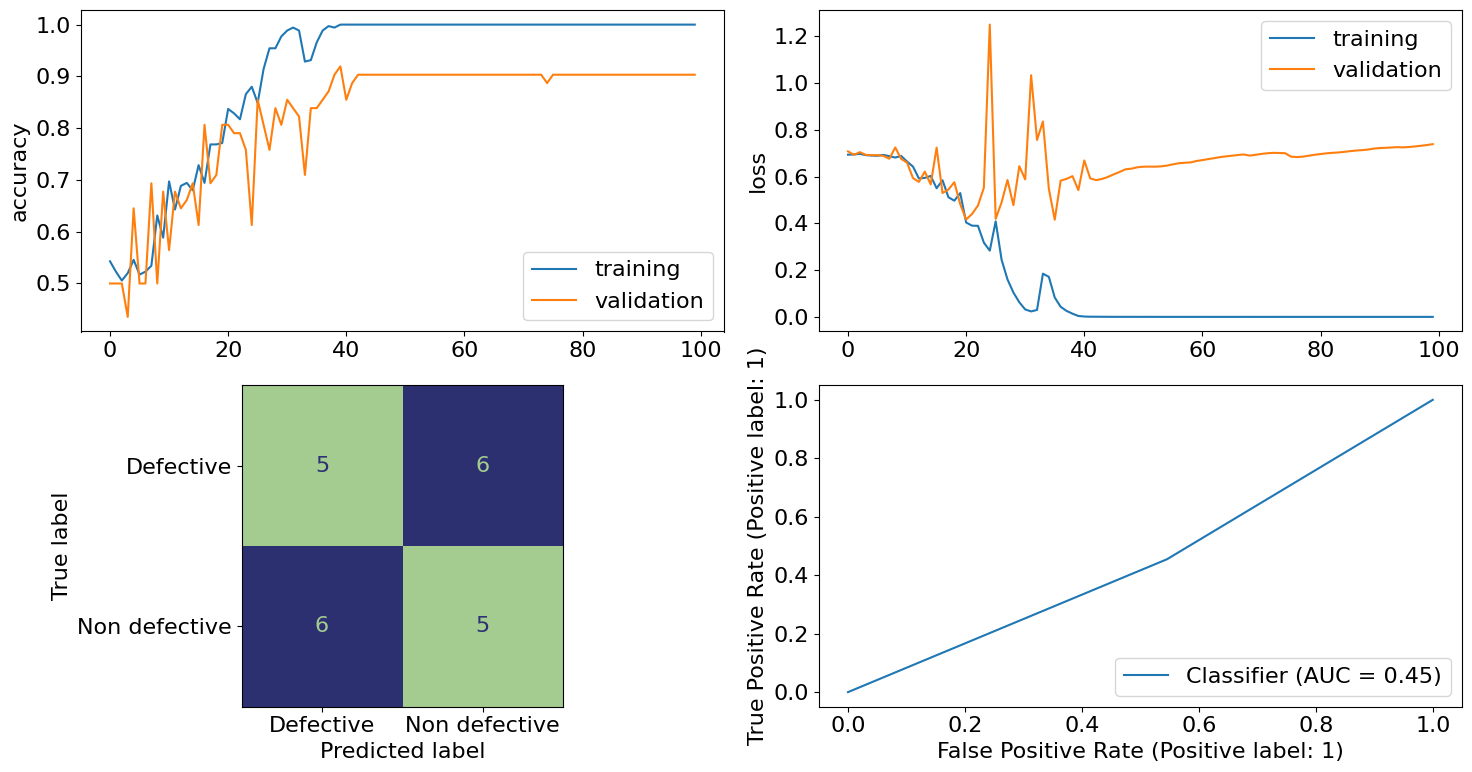

In [8]:
CNN = Model("AlexNet")

CNN.epochs = 100
CNN.batch_size = 32

CNN.optimizer = Adam(
    learning_rate=8.314541851625895e-05
)

CNN.callbacks = [
    TensorBoard(log_dir="./logs"),
    ModelCheckpoint(
        f"./models/{CNN.name}_LR.h5",
        monitor="val_accuracy",
        verbose=1,
        save_best_only=True,
        save_weights_only=False,
        mode="auto",
        save_freq="epoch",
    ),
]

CNN.load_datasets(color_mode='rgb')
CNN.build_model()
CNN.compile_model()
CNN.train_net()
CNN.model.load_weights('./models/AlexNet_LR.h5')
CNN.predict_test()
CNN.show_metrics(save_folder=images.plot_folder, postfix='LR')

1/1 [==============================] - 1s 901ms/step
Test values:          [1 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 0 1 1 0 0]
Predicted values:     [0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 1 0 1]


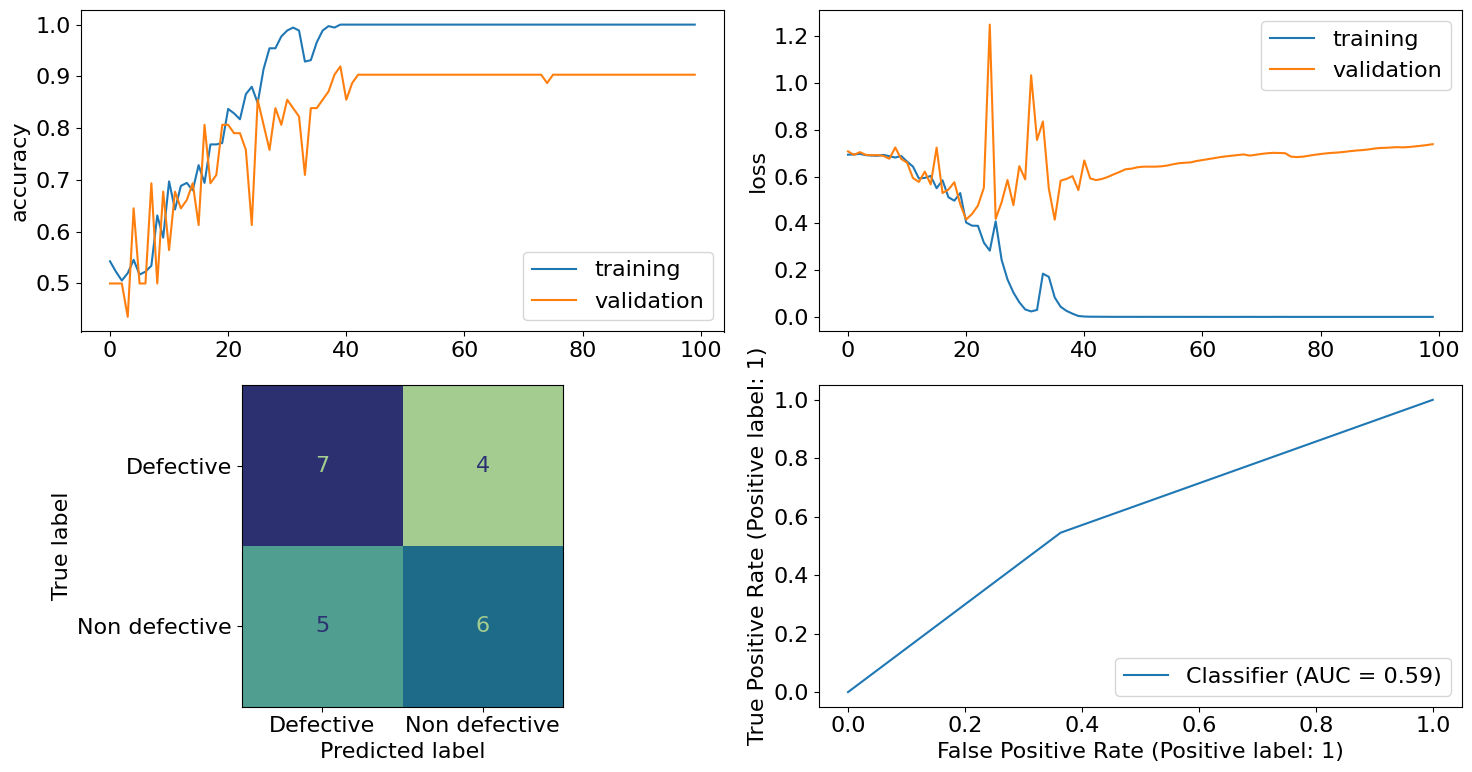

In [9]:
CNN.model.load_weights('./models/AlexNet_LR.h5')
CNN.predict_test()
CNN.show_metrics(save_folder=images.plot_folder, postfix='LR')